In [ ]:
# Creación de un modelo desde cero con aumento de imágenes y desprendimiento

In [ ]:
## Librerías necesarias

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

## Variables globales del sistema

In [5]:
original_dir = pathlib.Path("ExpandedDataset/")
new_base_dir = pathlib.Path("ExpandedDataset_organized/")
content = os.listdir(original_dir)
BATCH_SIZE = 64
size_x = 256
size_y = 256

## Creación de los datasets específicos a partir de las carpetas 

In [25]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')

Found 9280 files belonging to 58 classes.
Found 1160 files belonging to 58 classes.
Found 1160 files belonging to 58 classes.


## Nuevo modelo con una última capa de desprendimiento

In [26]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model2 = keras.Model(inputs=inputs, outputs=outputs)

model2.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
rescaling_5 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 60, 60, 128)       7385

## Entrenamiento y guardado de resultados del modelo dos

In [27]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="model2/best_version",
 save_best_only=True,
 monitor="val_loss")
]

model2.compile(loss="categorical_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

history = model2.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/30
145/145 [==============================] - 27s 171ms/step - loss: 3.8106 - accuracy: 0.1028 - val_loss: 3.1628 - val_accuracy: 0.1474
INFO:tensorflow:Assets written to: model2\best_version\assets
Epoch 2/30
145/145 [==============================] - 26s 169ms/step - loss: 2.5419 - accuracy: 0.3066 - val_loss: 2.2149 - val_accuracy: 0.3828
INFO:tensorflow:Assets written to: model2\best_version\assets
Epoch 3/30
145/145 [==============================] - 28s 184ms/step - loss: 1.8114 - accuracy: 0.4709 - val_loss: 2.0048 - val_accuracy: 0.4216
INFO:tensorflow:Assets written to: model2\best_version\assets
Epoch 4/30
145/145 [==============================] - 28s 186ms/step - loss: 1.3489 - accuracy: 0.5917 - val_loss: 1.6158 - val_accuracy: 0.5491
INFO:tensorflow:Assets written to: model2\best_version\assets
Epoch 5/30
145/145 [==============================] - 28s 183ms/step - loss: 1.0578 - accuracy: 0.6772 - val_loss: 1.1991 - val_accuracy: 0.6293
INFO:tensorflow:Assets writ

In [28]:
model2.save('model2/model')
np.save('model2/history.npy',history.history)

INFO:tensorflow:Assets written to: model2/model\assets


## Análisis de resultados

In [29]:
my_model1 = load_model('model1/model')
my_model2 = load_model('model2/model')
my_history1=np.load('model1/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model2/history.npy',allow_pickle='TRUE').item()

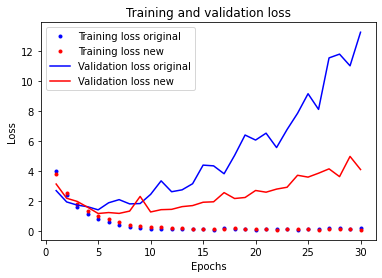

In [30]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

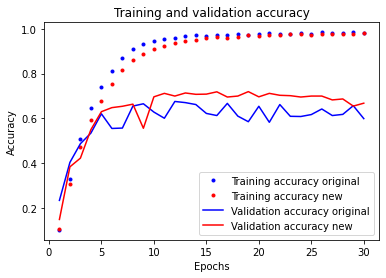

In [31]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
model = keras.models.load_model('model2/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 80ms/step - loss: 4.1992 - accuracy: 0.6733


[4.199192047119141, 0.673275887966156]

In [33]:
model = keras.models.load_model('model2/best_version')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 90ms/step - loss: 1.2028 - accuracy: 0.6129


[1.2028143405914307, 0.6129310131072998]